## Data Description

The data at hand contains medical costs of people
characterized by certain attributes.

## Domain

Healthcare

## Context

Leveraging customer information is paramount for most
businesses. In the case of an insurance company, attributes of
customers like the ones mentioned below can be crucial in
making business decisions. Hence, knowing to explore and
generate value out of such data can be an invaluable skill to
have.

## Objective

We want to see if we can dive deep into this data to find some
valuable insights.

1. Import the necessary libraries
2. Read the dataset as DataFrame
3. Perform basic EDA which should include the following and print out your insights at every step.
a) Shape of the data
b) Data type of each attribute
c) Checking the presence of missing values
d) 5 point summary of numerical attributes
e) Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.
f) Measure of skewness of ‘bmi’, ‘age’ and ‘charges’columns
g) Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns
h) Distribution of categorical columns (include children)
i) Pair plot that includes all the columns of the dataframe

4. Answer the following questions with statistical evidence
a) Do charges of people who smoke differ significantly from the people who don't?
b) Does bmi of males differ significantly from that of females?
c) Is the proportion of smokers significantly different in different genders?
d) Is the distribution of bmi across women with no children, one child and two children, the same ?

## Importing the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt    
import seaborn as sns
import numpy as np
from numpy import percentile
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
from statistics import mean

## Reading the dataset

In [2]:
healthcare_df = pd.read_csv("insurance.csv")

In [3]:
healthcare_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Checking for the null values

## 3.b - Datatype of each attribute

In [5]:
healthcare_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


## 3.a - Shape of dataframe

In [7]:
healthcare_df.shape

(1338, 7)

## 3- c presence of null values ?

In [8]:
healthcare_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


## 3.d - 5 point summary of numerical columns

In [9]:
df=healthcare_df.drop(columns=['sex','smoker','region'],axis=1)
        
# calculate quartiles
quartiles = percentile(df, [25, 50, 75])

# print 5-number summary
print( "Mean:")
print(df.mean())
print('Q1: %.3f' % quartiles[0])
print('Median: %.3f' % quartiles[1])
print('Q3: %.3f' % quartiles[2])
print('Max:')
print(df.max())

Mean:
age            39.207025
bmi            30.663397
children        1.094918
charges     13270.422265
dtype: float64
Q1: 13.220
Median: 32.470
Q3: 328.468
Max:
age            64.00000
bmi            53.13000
children        5.00000
charges     63770.42801
dtype: float64


## 3.e - Distribution of ‘bmi’, ‘age’ and ‘charges’ columns

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015A1B7EA4A8>,
      dtype=object)

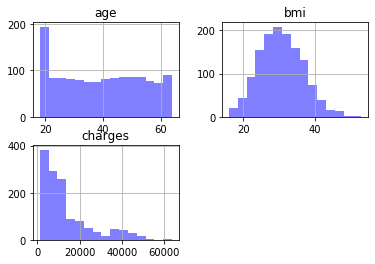

In [29]:
df.hist(column=['age','bmi','charges'],color='b', alpha=0.5, bins=15)

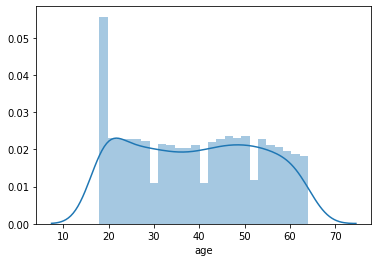

In [11]:
sns.distplot(df['age'],bins=25)

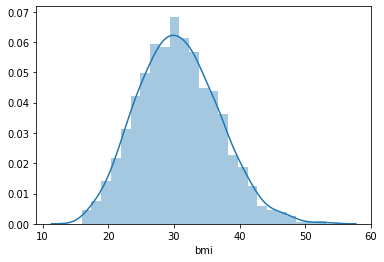

In [12]:
sns.distplot(df['bmi'],bins=25)

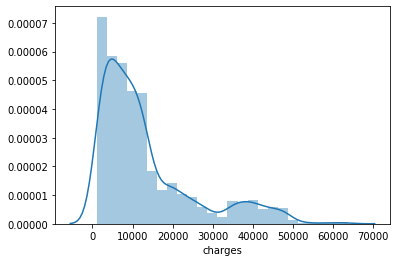

In [13]:
sns.distplot(df['charges'],bins=25)

## 3.f - measuring skewness for bmi, age and charges

In [14]:
df_copy=df.drop(['children'],axis=1)

In [15]:
df_copy.skew()

age        0.055673
bmi        0.284047
charges    1.515880
dtype: float64

### observations

1. For age and bmi, skewness is between -0.5 and 0.5, the data are fairly symmetrical.
2. For charges, the skewness is greater than 1, that means data is highly skewed.

## 3.g - detecting outliers in ‘bmi’, ‘age’ and 'charges' columns by using boxplot

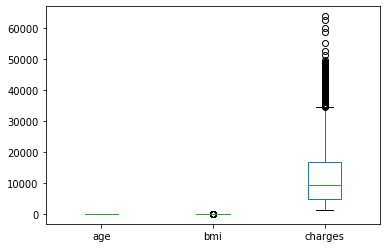

In [16]:
df_copy.plot.box()

#### Charges column has the outliers value; plotting the graph for the visualisation as below

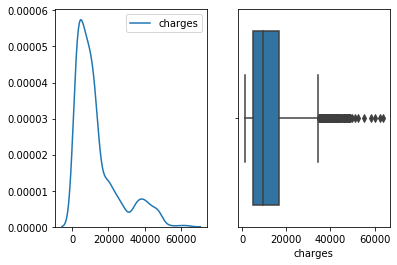

In [17]:
f, axes = plt.subplots(1, 2)
sns.kdeplot(df_copy['charges'], ax=axes[0])
sns.boxplot(df_copy['charges'], ax=axes[1])
plt.show()

## 3.h - distribution of categorical columns (including children)

In [20]:
healthcare_df1=healthcare_df.copy()
for feature in healthcare_df1.columns: # Loop through all columns in the dataframe
    if healthcare_df1[feature].dtype=='object': # Only apply for columns with categorical strings
        healthcare_df1[feature] = pd.Categorical(healthcare_df1[feature]).codes # Replace strings with an integer

In [21]:
healthcare_df1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [22]:
healthcare_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null int8
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null int8
region      1338 non-null int8
charges     1338 non-null float64
dtypes: float64(2), int64(2), int8(3)
memory usage: 45.8 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015A1B8F4898>,
      dtype=object)

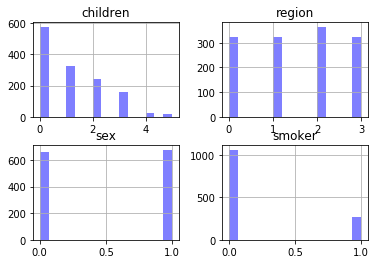

In [30]:
healthcare_df1.hist(column=['sex','smoker','children','region'],color='b', alpha=0.5, bins=15)

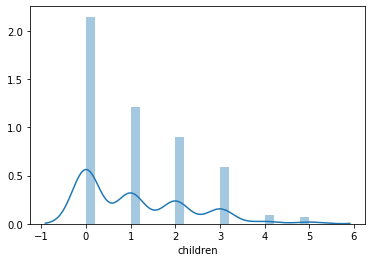

In [31]:
sns.distplot(df['children'],bins=25)

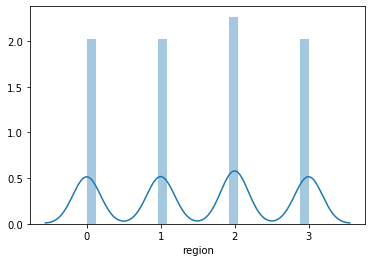

In [33]:
sns.distplot(healthcare_df1['region'],bins=25)

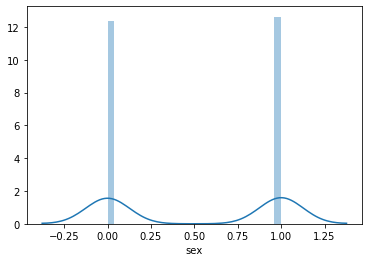

In [34]:
sns.distplot(healthcare_df1['sex'],bins=25)

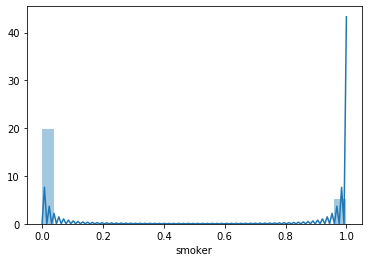

In [35]:
sns.distplot(healthcare_df1['smoker'],bins=25)

## 3. i - pair-plot showing all the columns of the dataframe

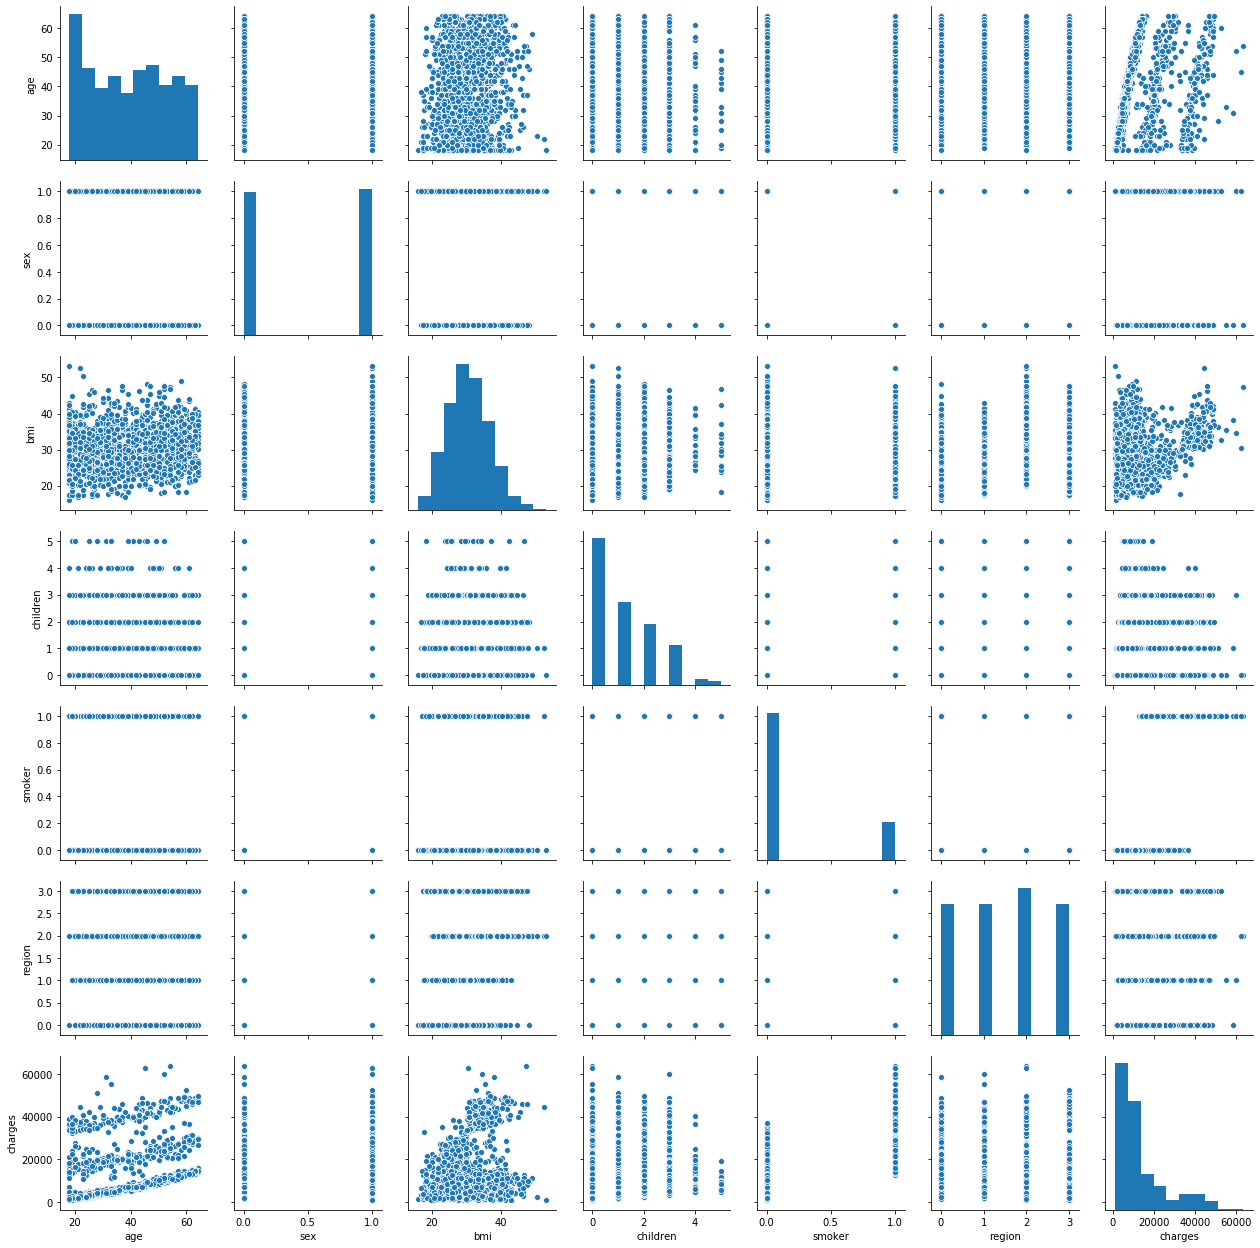

In [36]:
sns.pairplot(healthcare_df1)

## 4.a - finding out the charges of people who smoke differ significantly from the people who don't.

In [39]:
#prepare our 2 groups to test
smoker = healthcare_df1[healthcare_df1['smoker']==1]
non_smoker = healthcare_df1[healthcare_df1['smoker']==0]

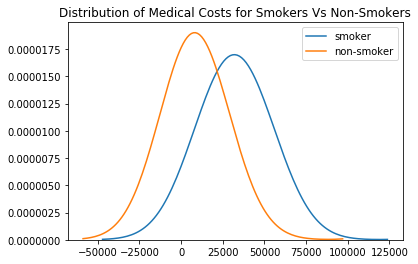

In [41]:
plt.title('Distribution of Medical Costs for Smokers Vs Non-Smokers')
ax = sns.kdeplot(smoker['charges'], bw=20000, label='smoker')
ax = sns.kdeplot(non_smoker['charges'], bw=20000, label='non-smoker')
plt.show()

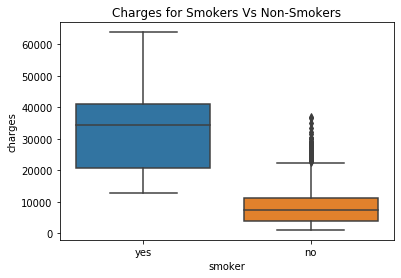

In [42]:
plt.title('Charges for Smokers Vs Non-Smokers')
ax = sns.boxplot(x="smoker", y="charges", data=healthcare_df)

In [43]:
print("Mean of the smoker:",mean(smoker['charges']))

Mean of the smoker: 32050.23183153285


In [44]:
print("Mean of the non_smoker:",mean(non_smoker['charges']))

Mean of the non_smoker: 8434.268297856202


### Observation
As per the graph, it may be concluded that charges for the smoker is higher than that of the non-smokers !!

## 4.b - does bmi of males differ significantly from that of females ?

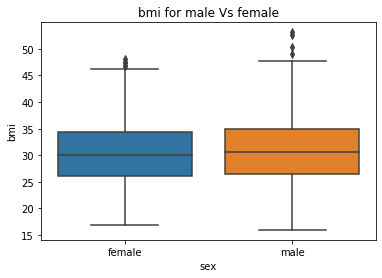

In [45]:
plt.title('bmi for male Vs female')
ax = sns.boxplot(x="sex", y="bmi", data=healthcare_df)

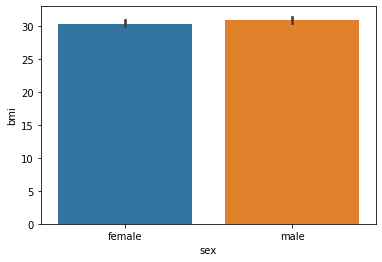

In [46]:
sns.barplot(x="sex", y="bmi", data=healthcare_df)

### Observation

1. BMI for male and female are almost same in proportions.
2. Few outlier are seen in both male and female i.e they are having high BMI.


## 4.c - proportion of smokers significantly different in different genders

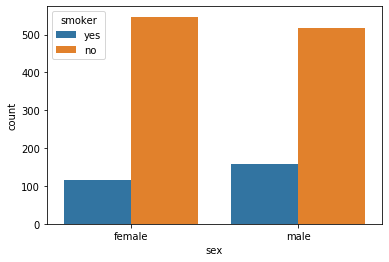

In [48]:
### count of men and women who are smokers
sns.countplot(x='sex',data=healthcare_df,hue='smoker')

#### Observation

The proportions of smokers among both male & female are almost same.

## 4.d - distribution of bmi across women with no children, one child and two children, the same

In [49]:
female = healthcare_df[healthcare_df['sex']=='female']

In [50]:
female.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92400
5,31,female,25.74,0,no,southeast,3756.62160
6,46,female,33.44,1,no,southeast,8240.58960
7,37,female,27.74,3,no,northwest,7281.50560
9,60,female,25.84,0,no,northwest,28923.13692


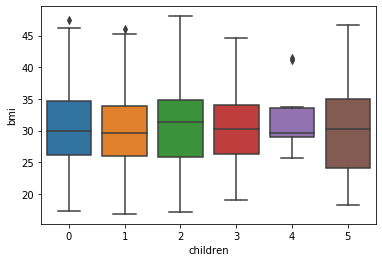

In [51]:
sns.boxplot(x="children", y="bmi", data=female)

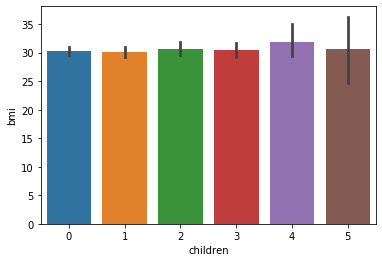

In [52]:
sns.barplot(x="children", y="bmi", data=female)

### Observation
1. BMI for the women having child 0,1 and 2 are almost same.
2. There are few outliers for the women having child 0 and 1.

## using hyphothesis testing to see if the charges are diff or same of smokers and non smokers

* $H_0$: $\mu$ = Charges for both smoker and non smoker are same
* $H_A$: $\mu$ > Charges for both smoker and non smoker are not same

In [54]:
statistic, pvalue = stats.ttest_ind(non_smoker['charges'], smoker['charges'], equal_var = False)
print("2 sample, 2 sided t-test pvalue:  {} t-stat: {}".format(pvalue,statistic))

2 sample, 2 sided t-test pvalue:  5.88946444671698e-103 t-stat: -32.751887766341824


T-Statistic =  332.6135162726081
P_Value =  1.5593284881803726e-66
P_Value is greater than 5% hence Failed to the Reject Null.
One-Way ANOVA Test
F-Value =  2177.614868056519
P-Value =  8.271435842182967e-283
P-Value is greater than 0.05 hence failed to Reject Null, accepting alternate hypothesis test
verify the overlapping :


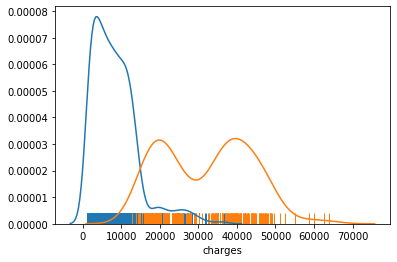

In [55]:
from scipy.stats import levene
import seaborn as sns
t_statistic, p_value = levene(non_smoker['charges'], smoker['charges'])
print("T-Statistic = ", t_statistic)
print("P_Value = ", p_value)
print("P_Value is greater than 5% hence Failed to the Reject Null.")
print("One-Way ANOVA Test")
F_value, p_value = stats.f_oneway(non_smoker['charges'], smoker['charges'])
print("F-Value = ", F_value)
print("P-Value = ", p_value)
print("P-Value is greater than 0.05 hence failed to Reject Null, accepting alternate hypothesis test")
print("verify the overlapping :")
sns.distplot(non_smoker['charges'], hist=False, rug=True)
sns.distplot(smoker['charges'], hist=False, rug=True)
plt.show()

## Conclusion

As per the above graph and the calculated p-value, null hypothesis is rejected as p value is greater than 0.05% hence accepting the alternate hypothesis.
